## Procesado del histograma

In [10]:
!pip install opencv_python
!pip install scikit-image
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 9.5 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 9.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


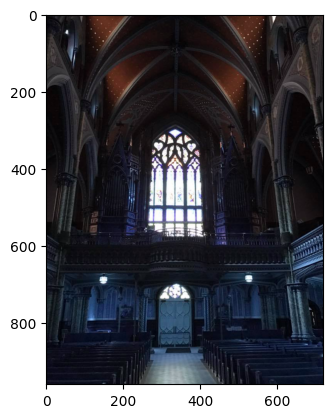

In [11]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

img = cv2.imread("img1.tif", 1)
plt.imshow(img)

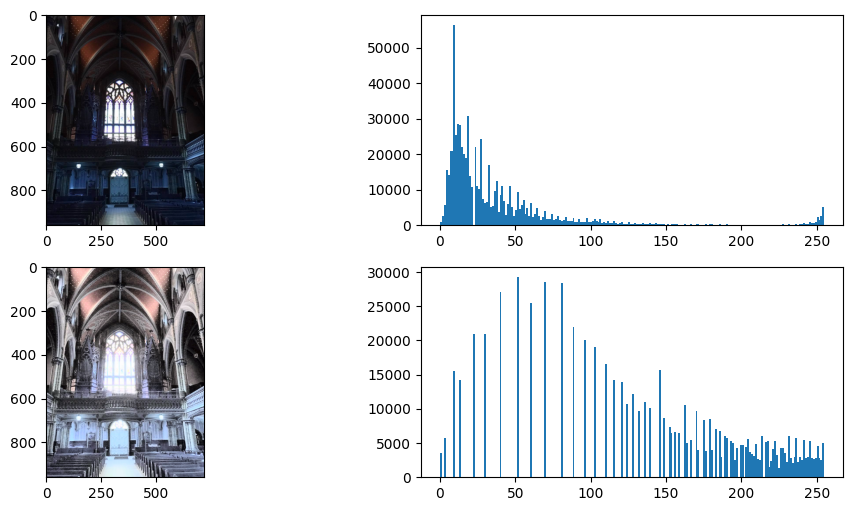

In [12]:
#Converting image to LAB Color so CLAHE can be applied to the luminance channel

lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.hist(l.flat, bins=200, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv2.equalizeHist(l)


#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv2.merge((equ,a,b))
updated_lab_img1 = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)


plt.subplot(223)
plt.imshow(updated_lab_img1)
plt.subplot(224)
plt.hist(equ.flat, bins=200, range=(0,255))

#Convert LAB image back to color (RGB)
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

In [13]:
###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

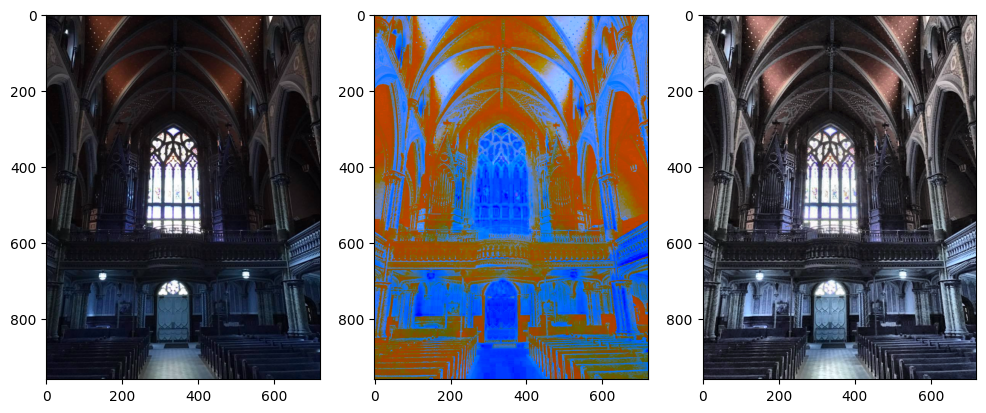

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(hist_eq_img)
plt.subplot(133)
plt.imshow(CLAHE_img)
plt.show()